# Credit Card Defaulters Prediction using Machine Learning Algorithms 

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Importing data from Kaggle
df= pd.read_csv('creditcard defaulter dataset.csv')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
# Dropping ID column
df = df.drop(["ID"],axis=1)

In [9]:
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [11]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,50000.0,1,2,1,46,0,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


## Data Preprocessing

In [12]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [13]:
# Since values of 6th and 0th are less in above , so mapping them into 4th one
df["EDUCATION"]=df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [14]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [15]:
# Since values of 0th is less in above , so mapping them into 3rd one
df["MARRIAGE"]=df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

### Standard scaling
#### For Huge data, we usually Scale down for better Accuracy !

In [16]:
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()

X= df.drop(['default.payment.next.month'],axis=1)
X= scaling.fit_transform(X)

In [17]:
y=df['default.payment.next.month']

### Hyperparameter Tuning

In [19]:
# Defining Parameters :

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

### Using RandomizdSearchCV

In [20]:
from sklearn.model_selection import RandomizedSearchCV

Calculating time that RandomizedSearchCV will take for running fit method :

In [21]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken will be: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

### XGBoost Classifier

In [24]:
import xgboost

In [25]:
classifier=xgboost.XGBClassifier()

In [26]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


Making RandomizedSearch Fit Model

In [27]:
from datetime import datetime

start_time = timer(None)

random_search.fit(X,y)

timer(start_time) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


D:\Software\Anaconda Ankur\Files\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken will be: 0 hours 0 minutes and 57.98 seconds.


### Now, Using the above Search Fit , finding the best estimator

In [28]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [33]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Using Cross-Validation 
*Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data*
Using Cross Validation to check overfitting of the model

In [34]:
from sklearn.model_selection import cross_val_score

In [37]:
score=cross_val_score(classifier,X,y,cv=12)

In [36]:
score

array([0.8052, 0.8032, 0.8172, 0.8132, 0.7988, 0.8204, 0.8228, 0.8444,
       0.8312, 0.824 , 0.826 , 0.8204])

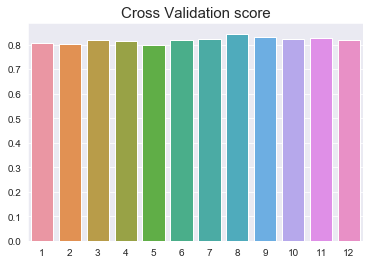

In [46]:
import seaborn as sns
sns.set_style('darkgrid')
x_score = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.title("Cross Validation score", size = 15)
sns.barplot(x_score,score)

In [49]:
max(score)

0.8444

#### Overall Accuracy - 

In [50]:
score.mean()

0.8189000000000001